Karmaşıklık matrisi bir eksende tahmin diğer ekseninde gerçek değerlerin olduğu 2 boyutlu bir matristir. Tahmin edilen değerler ile gerçek değerler bir takım işlemlerden geçerek bu matris elde edilir ve bu matris üzerinden model hakkında bazı çıkarımlarda bulunulur. Örnekte binomal veriler üzerinden tahminler yapılacaktır.

Önce gerekli modülleri içeri aktaralım. 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

####  Veriyi Okuma

Veri setimizi pandas ile alalım ve verilerimizi tanıyalım. 

In [5]:
data = pd.read_csv("kanser.csv")
data.head() # ilk 5 satır

,Cinsiyet,Yaş,Alkol,Sigara,Radyasyon,Kanser
0,e,85,yok,yok,var,hayır
1,k,33,var,var,yok,evet
2,e,54,var,yok,var,hayır
3,e,38,var,var,yok,hayır
4,e,44,yok,yok,var,evet


In [6]:
data.shape

(50, 6)

Toplam 50 bireyden alınan özellikleri barındırıyor. Veri seti bireylerin cinsiyet, yaş, alkol kullanımı, sigara kullanımı ve radyasyona maruz kalma gibi özelliklerinden yola çıkarak bireyin kanser olup olmadığını göstermektedir. (Veriler random oluşturulmuştur) Bu veri setinin gerekli veri önişleme adımlardan geçtiğini varsayalım ve yolumuza devam edelim.

Gelen verilerden kanseri tahmin edeceğimiz için bağımlı değişkenimiz(y) kanser olacaktır

Özelliklerin birbirleri ile olan korelasyonuna bakalım.

In [14]:
data.corr() # Not: veriler nümerik olmalı

,Cinsiyet,Yaş,Alkol,Sigara,Radyasyon,Kanser
Cinsiyet,1.000000,-0.028550,-0.003213,-0.071140,0.180207,-0.120386
Yaş,-0.028550,1.000000,-0.253964,-0.253718,-0.109440,-0.148815
Alkol,-0.003213,-0.253964,1.000000,0.125809,0.294174,-0.080064
Sigara,-0.071140,-0.253718,0.125809,1.000000,0.098693,0.161165
Radyasyon,0.180207,-0.109440,0.294174,0.098693,1.000000,-0.081650
Kanser,-0.120386,-0.148815,-0.080064,0.161165,-0.081650,1.000000


Veriler random olduğu için korelasyon değerleri pek iyi sayılmaz. Bu yazıda daha çok karmaşıklık matrisini ele alacağımız için bu süreçleri atlayarak model kuralım.

####  Kategorik Değişkenler => Numeric Değişkenler

Modelimizi kurmadan önce veri setindeki özellikler(Yaş hariç) kategorik değişkenlerdir. Bunları önce numeric değerlere 0 ve 1
gibi modelin anlayacağı dile çevirelim. Sklearn içindeki çeşitli encoding yöntemleri yapabiliriz ama basit bir işlem olduğu için elle bir fonksiyon yazıp işlemi gerçekleştirelim.

categorical_encoder fonksiyonumuz;

In [9]:
def categorical_encoder(data,column_name):
    if len(data[column_name].unique()) == 2:
        data[column_name].replace(
            {data[column_name].unique()[0]:0,
             data[column_name].unique()[1]:1},inplace=True)
    else:
        data[data[column_name].unique()] = 0
        for i in range(0,len(data)):
            data[data[column_name][i]][i] = 1
        data.drop(f"{column_name}",axis=1,inplace = True)
    return data

Fonksiyon basitçe veri setini ve numeric yapılmak istenen değişkeni alıp numeric bir veri olarak return ediyor. Bütün kolonları(özellik-feature) tek tek fonksiyona göndermeyelim for döngüsü ile daha seri bir şekilde işimizi halledelim.

In [10]:
for i in data.drop("Yaş",axis=1).columns:
    categorical_encoder(data,i)

Bu işlemden sonra veri setimize bakalım

In [11]:
data.head() # ilk 5 satır

,Cinsiyet,Yaş,Alkol,Sigara,Radyasyon,Kanser
0,0,85,0,0,0,0
1,1,33,1,1,1,1
2,0,54,1,0,0,0
3,0,38,1,1,1,0
4,0,44,0,0,0,1


Evet görüldüğü üzere veri setindeki kategorik değişkenler 0 ve 1'lerden oluşan numeric değerlere çevrilmiş durumda. Kanser kolonunda 0 'hayır' yani kanser değil ve 1 'evet' yani kanserdir değerlerini temsil eder.

#### Veri setini bölme (train test split)  &  Model kurma

Verileri eğitim ve test olarak bölelim ve model kurmak için veriyi hazır hale getirelim. 

In [12]:
X = data.drop("Kanser",axis=1)
Y = data["Kanser"]

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.30,random_state=0)

rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

yukarıda bölünmüş verilerle Random Forest ile bir model kuruldu ve model eğitildi. Kurulan bu model ile tahmin yapalım.

In [17]:
y_pred = rfc.predict(x_test)
y_pred # tahmin değerleri

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0], dtype=int64)

#### Confusion Matrix

Yapılan bu tahmin değerleri elimizde bulunan gerçek değerler (y_test değerleri) arasında bazı karşılaştırmalar yapalım.
Gerçek ve tahmin değerlerini bir dataframe ile birleştirip görelim.

In [18]:
sonuc = pd.DataFrame(y_pred,columns=["Kanser (tahmin)"])
sonuc["Kanser (gercek)"] = y_test.values
sonuc.head() # ilk 5 satırı

,Kanser (tahmin),Kanser (gercek)
0,1,1
1,1,0
2,0,0
3,0,1
4,0,0


yukarıdak tabloyu inceleyecek olursak gerçekte 1 olan('evet' yani kanser) değeri modelimiz de 1 olarak tahmin etmiş doğru bir
tahmin yapmış. Gerçekte 0 olan('hayır') değeri modelimiz 1 olarak yani evet olarak yanlış bir tahmin yapmış oldu. İşte bu tahmin ve gerçek değerleri karşılaştırdığımızda aşağıdaki kavramlarla karşılaşırız.

Pozitif(p) = evet (1) 

negatif(k) = hayır (0)   olarak belirtilsin.
<p style="color:red;">True pozitif(Tp):</p> Gerçekte kanser olan birisini modelin de "kanser" olarak tahmin etmesi (Yani doğru bir tahmin var ve pozitif yönde)
<p style="color:red;">True negatif(Tn):</p> Gerçekte kanser olmayan birisini modelin de "kanser değil" olarak tahmin etmesi (Doğru bir tahmin var ve negatif yönde)
<p style="color:red;">False negatif(Fn):</p> Gerçekte kanser olan birisini modelin "kanser değil" olarak tahmin etmesi (Yanlış bir tahmin var ve negatif yönde)
<p style="color:red;">False pozitif(Fp):</p> Gerçekte kanser olmayan birisini modelin "kanser" olarak tahmin etmesi (Yanlış bir tahmin var ve pozitif yönde)

<p style ="color: red">Accuracy Score: </p> Sınıflandırma algoritmasının başarısını ölçer. Doğru yapılan tahminlerin tüm tahminlere oranını belirtir. 100 tane tahmin için 75 tanesini doğru bir şekilde tahmin ettiğimizi varsayarsak accuracy score 75/100 yani 0.75 olarak bulunur. Modeli değerlendirmek için bu değer tek başına yeterli olmayabilir. 

Formül = (tp+tn) / toplam tahmin sayısı


<p style="color:red;">recall(sensitivity)(TPR):</p>True Positive Rate (Doğru positif oranı) gerçekte kanser olanların kaç tanesinin doğru sınıflandırıldığını belirtir. Gerçekte kanser olanların/(Gerçekte kanser)modelin "kanser" ve "kanser değil" olarak tahmin ettiği veriler toplamı

Formül = Tp / (Tp+Fn)

<p style="color:red;">False Positive Rate(FPR):</p>Yanlış pozitif oranı gerçekte kanser olmayanların kaç tanesinin doğru sınıflandırıldığını belirtir. Gerçekte kanser olmayan/Gerçekte kanser olmayan birisini modelin "kanser" + Gerçekte kanser olmayan birisini modelin "kanser değil" olarak tahmin ettiği veriler

Formül = Fp / (Tn+Fp)

Hayır  negatif olarak ve evet ise pozitif olarak kabul edersek şöyle bir tablo elde edebiliriz

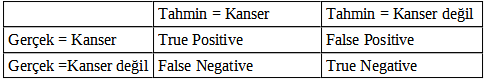

In [200]:
from PIL import Image
Image.open("cm_matrix.png")

Yukarıdaki kavramları anladığımıza göre bu değerleri gerçek ve tahminlerden nasıl elde edeceğimize bakalım.

True positive aslında gerçekte 1 olup modelin de 1 olarak tahmin ettiği değerlerdir. O halde gerçekler ile tahminleri topladığımızda 2 olanların sayısı bize True positive sayısını verecektir.

True negative ise gerçekte 0 olup modelin de 0 olarak tahmin ettiği değerlerdir. Yine gerçekler ve tahminleri toplarsak 0 olanların sayısı ( 0 ile 0 toplamı yine sıfırdır :) ) bize true negative sayısını verecektir.

False pozitif gerçekte 0 olup modelin 1 olarak tahmin ettiği değerlerdir. O halde gerçekler ile tahmin çıkarılırsa -1 olanların sayısı (0-1 = -1) bize false negative sayısını verecektir.

False negative ise gerçekte 1 olup modelin 0 olarak tahmin ettiği değerlerdir. O zaman gerçeklerin ve tahminlerin birbirlerinde çıkarılması ile elde edilen 1 (1-0= 1) değerlerinin sayısı bize  false negative sayısını verecektir.

Gerçek değerleri ve tahmin değerleri birbirleri ile toplayıp çıkarım. Bunlar dataframe olarak tabloda gösterelim

In [19]:
sonuc["toplam"] = sonuc[f"Kanser (tahmin)"]+sonuc["Kanser (gercek)"]
sonuc["fark"] = sonuc["Kanser (tahmin)"]-sonuc["Kanser (gercek)"]
sonuc.head()

,Kanser (tahmin),Kanser (gercek),toplam,fark
0,1,1,2,0
1,1,0,1,1
2,0,0,0,0
3,0,1,1,-1
4,0,0,0,0
5,1,0,1,1
6,1,1,2,0
7,1,1,2,0
8,0,1,1,-1
9,1,1,2,0


Toplam sütunundaki 2 değerleri TP, 0 değerleri TN
Fark sütunundaki -1 değerleri FP, 1 değerleri FN şeklinde olacaktır.

Bu değerleri sayalım


In [20]:
TP  = sonuc.query("toplam == 2").count()[0]
TN = sonuc.query("toplam == 0").count()[0]
FP = sonuc.query("fark == -1").count()[0]
FN = sonuc.query("fark == 1").count()[0]
print(f"TP: {TP}\nTN: {TN}\nFP: {FP}\nFN: {FN}")

TP: 5
TN: 4
FP: 2
FN: 4


Yukarıdaki tablodan hareketle karmaşıklık matrisini oluşturalım.

In [21]:
matrix = np.array([TN,FN,FP,TP]).reshape(2,2)
print("Karmaşıklık Matrisi(Confusion Matrix):\n",matrix)

Karmaşıklık Matrisi(Confusion Matrix):
 [[4 4]
 [2 5]]


diğer terimleri hesaplayalım

In [22]:
acc = round((TP+TN)/sonuc.shape[0],3)
precision = round(TP/(TP+FP),3)
recall_sensitivity = round(TP/(TP+FN),3)
specificity = round(TN/(TN+FP),3)
f1_score = round(2*((precision*recall_sensitivity)/(precision*2)),3)
false_pos_rate = round(1-specificity,3)
print(f"""acc: {acc}
precision: {precision}
recall: {recall_sensitivity}
specificity: {specificity}
f1 score: {f1_score}
FPR: {false_pos_rate}""")

acc: 0.6
precision: 0.714
recall: 0.556
specificity: 0.667
f1 score: 0.556
FPR: 0.333


#### Accuracy Paradox ve ZeroR algoritması

Sadece accuracy değerlerine bakılarak sınıflandırma algoritmalarını değerlendirmek doğru olmayabilir. Örnek olarak ZeroR algoritması verilebilir. ZeroR algoritması esasında gelen verilerin sınıflarına bakar ve hangi sınıftan daha fazla örnek varsa onu çıktı değeri belirler. Yani Gelen verilerden en çok 1 değeri varsa bundan sonra yapılacak tüm tahminlerde sonuç olarak 1 döndürecektir çünkü en fazla örnek 1 sınıfına ait. Böyle olunca accuracy değerleri daha yüksek çıkmaya başlar. Oysaki hiç bir öğrenme ve değerledirme yapmadan TN,TP,FN,FP değerli tek bir sınıfa dahil ederek çıktı üretiyor. Bu algoritma accuracy değeri yüksek çıkmasına rağmen başarılı bir algoritma olarak değerlendirilmez. Çünkü diğer tüm çıktıları gözardı ederek sadece fazlalığa odaklandığı için sağlıklı bir sonuç vermeyecektir. O yüzdendir ki sınıflama algoritmalarını değerlendirirken diğer kriterleri de göz önünde bulundurmak gerekir.

In [23]:
confusion_matrix(y_test,y_pred)

array([[4, 4],
       [2, 5]], dtype=int64)

In [101]:
Confusion_Matrix(y_test,y_pred)

acc: 0.533
precision: 0.714
recall: 0.5
specificity: 0.6
f1 score: 0.5
FPR: 0.4


array([[3, 5],
       [2, 5]], dtype=int64)

In [172]:
accuracy_score(y_test,y_pred)
confusion_matrix(y_test,y_pred)

array([[3, 5],
       [4, 3]], dtype=int64)

### ROC (Receiver Operating Characteristic)

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score,roc_curve

In [25]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
gnb_predict = gnb.predict(x_test)

C:\Users\akmet\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [26]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc_predict = dtc.predict(x_test)

Roc AUC:GNB 0.6964285714285714
Roc AUC:DTC 0.6517857142857143
Roc AUC:RFC 0.5892857142857143


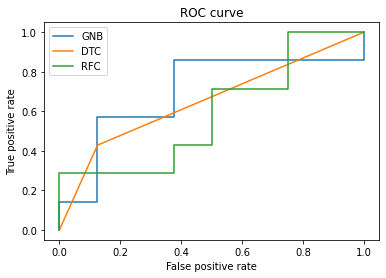

In [40]:
y_proba = gnb.predict_proba(x_test)[:,1]
print("Roc AUC:"+"GNB", roc_auc_score(y_test, gnb.predict_proba(x_test)[:,1],average='macro'))
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label="GNB")

y_proba = dtc.predict_proba(x_test)[:,1]
print("Roc AUC:"+"DTC", roc_auc_score(y_test, dtc.predict_proba(x_test)[:,1],average='macro'))
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label="DTC")

y_proba = rfc.predict_proba(x_test)[:,1]
print("Roc AUC:"+"RFC", roc_auc_score(y_test, rfc.predict_proba(x_test)[:,1],average='macro'))
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label="RFC")

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

AUC, oluşturulan modellerin verilere ne kadar hızlı cevap verdiğini gösterir. Yukarıda 3 model için AUC değerleri görünmektedir

In [75]:
rfc_cm = Confusion_Matrix(y_test,y_pred)
dtc_cm = Confusion_Matrix(y_test,dtc_predict)
gnb_cm = Confusion_Matrix(y_test,gnb_predict)

acc: 0.6
precision: 0.714
recall: 0.556
specificity: 0.667
f1 score: 0.556
FPR: 0.33299999999999996
acc: 0.667
precision: 0.429
recall: 0.75
specificity: 0.636
f1 score: 0.75
FPR: 0.364
acc: 0.6
precision: 0.571
recall: 0.571
specificity: 0.625
f1 score: 0.571
FPR: 0.375


koordinat düzlemine trp ve fpr verilerek her bir algoritmanın tpr v fpr verileri bu düzlemde bir nokta olarak belirtilmesidir. Birden fazla sınıflandırma algoritmaları için bir karar vermek için kullanılır

In [68]:
def tpr_fpr(matrix):
    fpr = matrix[1][0]/(matrix[0][0]+matrix[1][0])*100
    tpr = matrix[1][1]/(matrix[0][1]+matrix[1][1])*100
    return [round(tpr,2),round(fpr,2)]

In [69]:
dd = pd.DataFrame(np.zeros(3*2).reshape(2,3),columns = ["RFC","DTC","GNB"],index = ["x","y"])
dd["RFC"] = tpr_fpr(rfc_cm)
dd["DTC"] = tpr_fpr(dtc_cm)
dd["GNB"] = tpr_fpr(gnb_cm)
dd

,RFC,DTC,GNB
x,55.56,75.00,57.14
y,33.33,36.36,37.50


Basit bir plot çizdirerek farklı modellerin tpr ve fpr değerlerine bağlı olarak hangi konumda olduklarını görelim.

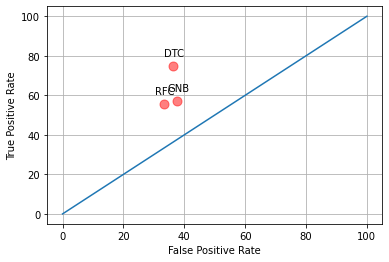

In [74]:
plt.scatter(dd.loc["y"],dd.loc["x"],color="red",s = (30*0.3)**2,alpha=0.5)
plt.plot((0,100),(0,100))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
for i in dd.columns:
    plt.annotate(f"{i}", (dd[i]["y"]-3,(dd[i]["x"]+5)),)
plt.grid(True)
plt.savefig("plt1.png")

0 noktasından başlayan doğrumuz eşik olarak kabul edilebilir. Modellerin doğrunun altına inmesi model performansının tekrar değerlendirilmesi ve düzeltilmesi gerektiği yorumu yapılabilir.

In [140]:
# import random
# c = ["e","k"]
# a = ["var","yok"]
# s = ["var","yok"]
# r = ["var","yok"]
# k = ["evet","hayır"]
#  data = pd.DataFrame(np.zeros(6*50).reshape(50,6),columns= ["Cinsiyet","Yaş","Alkol","Sigara","Radyasyon","Kanser"])
# l = []
# while len(l)<50:
#     l.append(k[random.randint(0,1)])
# data["Kanser"] = l
# data.to_csv("kanser.csv")

In [29]:
# 0  = e ve  = k
def Confusion_Matrix(y_test,y_pred):
    sonuc = pd.DataFrame(y_pred,columns=[f"{y_test.columns[0]} (tahmin)"])
    sonuc[f"{y_test.columns[0]} (gercek)"] = y_test.values
    sonuc["toplam"] = sonuc[f"{y_test.columns[0]} (tahmin)"]+sonuc[f"{y_test.columns[0]} (gercek)"]
    sonuc["fark"] = sonuc[f"{y_test.columns[0]} (tahmin)"]-sonuc[f"{y_test.columns[0]} (gercek)"]
    tp  = sonuc.query("toplam == 2").count()[0]
    tn = sonuc.query("toplam == 0").count()[0]
    fp = sonuc.query("fark == -1").count()[0]
    fn = sonuc.query("fark == 1").count()[0]
    matrix = np.array([tn,fn,fp,tp]).reshape(2,2)
    acc = round((tp+tn)/sonuc.shape[0],3)
    precision = round(tp/(tp+fp),3)
    recall_sensitivity = round(tp/(tp+fn),3)
    specificity = round(tn/(tn+fp),3)
    f1_score = round(2*((precision*recall_sensitivity)/(precision*2)),3)
    false_pos_rate = 1-specificity
    print(f"acc: {acc}\nprecision: {precision}\nrecall: {recall_sensitivity}\nspecificity: {specificity}\nf1 score: {f1_score}\nFPR: {false_pos_rate}")
    return matrix